# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.


In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.087338179 W= 0.306634 b= 0.391119
Epoch: 0100 cost= 0.086139232 W= 0.303242 b= 0.415524
Epoch: 0150 cost= 0.085078910 W= 0.300051 b= 0.438478
Epoch: 0200 cost= 0.084141210 W= 0.29705 b= 0.460067
Epoch: 0250 cost= 0.083311968 W= 0.294228 b= 0.480372
Epoch: 0300 cost= 0.082578741 W= 0.291573 b= 0.499469
Epoch: 0350 cost= 0.081930332 W= 0.289076 b= 0.517429
Epoch: 0400 cost= 0.081356935 W= 0.286728 b= 0.534322
Epoch: 0450 cost= 0.080849916 W= 0.28452 b= 0.550211
Epoch: 0500 cost= 0.080401599 W= 0.282442 b= 0.565155
Epoch: 0550 cost= 0.080005184 W= 0.280489 b= 0.57921
Epoch: 0600 cost= 0.079654679 W= 0.278651 b= 0.59243
Epoch: 0650 cost= 0.079344749 W= 0.276923 b= 0.604864
Epoch: 0700 cost= 0.079070799 W= 0.275297 b= 0.616557
Epoch: 0750 cost= 0.078828618 W= 0.273769 b= 0.627554
Epoch: 0800 cost= 0.078614503 W= 0.272331 b= 0.637896
Epoch: 0850 cost= 0.078425199 W= 0.270979 b= 0.647624
Epoch: 0900 cost= 0.078257889 W= 0.269707 b= 0.656773
Epoch: 0950 cost= 0.078109980 W=

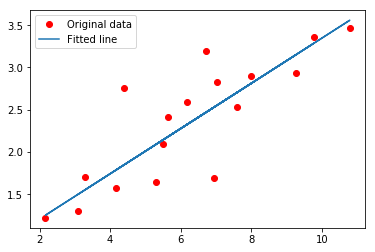

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# Regression result